In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
#from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

## Load data 

In [3]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

y = [1], it's a 'cat' picture.


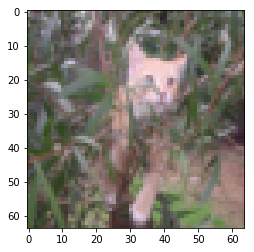

In [28]:
index=185
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

## Preprocessing
1. flatten image
2. normalize

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [6]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [7]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

## General Architecture of the learning algorithm

1. Initialize the parameters of the model
2. Learning the parameters for the model by minimizing the cost
3. Use the learned parameters to make predictions on test set
4. Analyze the results and conclude

## Building the algorithm 

1. Define the model structure (X, w,b,Y, etc)
2. Initialze the model's parameters
3. Loop for updating 

In [15]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [16]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w,b

In [17]:
def propagate(w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -(np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1-A).T))/m
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    print(cost)
    assert(cost.shape == ())
    grads = {'dw':dw,'db':db}
    return grads, cost

In [20]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i%100==0:
            costs.append(cost)
        if print_cost and i%100==0:
            print('cost after iteration %1:%f' %(i,cost))
        
    params = {'w':w,
                 'b':b}
    grads = {'dw':dw,
                'db':db}
        
    return params, grads, costs

In [22]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        if (A[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape == (1,m))
    return Y_prediction

In [23]:
def model(X_train,Y_train,X_test,Y_test,num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    w,b = initialize_with_zeros(X_train.shape[0])
    
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost = False)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

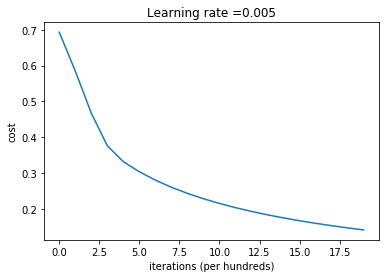

In [26]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()